In [43]:
import sys
sys.path.append('../')

In [44]:
from scripts.utils import data_path
from scripts.cross_match_scripts import build_keras_model, plot_metrics, assess_classifier, save_keras_classifier, assess_classifier, photo_prior_create_train_test_validation_data
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
%matplotlib inline
photo_cat_scaled = pd.read_pickle('model/train_test_validation_data.pkl')

load_models = True

from xgboost import XGBClassifier


# Classification model: xgboost - gradient boosting

## GRZW1W2 data - baseline model

In [57]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2w3w4', drop_missing=False)

total x-ray sources:  39102
total non-x-ray sources:  326948
total sources:  366050
number of x-ray sources per flux bin:
x_ray_flux_bin
0    39102
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    326948
dtype: int64
x-ray flux bins:
[3.00076359e-15 9.70410542e-12]
********************
flux bin:  3.0007635913564e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'mag_w3', 'mag_w4', 'col_gr', 'col_rz', 'col_gz', 'col_zw1', 'col_rw2', 'col_w1w2', 'col_zw3', 'col_rw4', 'col_w3w4']
train size examples - filed:  183091
train size examples - x-ray: 21897
test size examples - filed:  45773
test size examples - x-ray 5474
validation size examples - filed:  98084
validation size examples - x-ray: 11731
downsampled field sources:  False
data is scaled


In [58]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])




In [61]:
y_train_weight = class_weight_train[0]*(1-y_train)+class_weight_train[1]*y_train
model = XGBClassifier(n_estimators = 300, max_depth = 4, verbosity = 0, n_jobs = -1, eval_metric = 'loss',
    use_label_encoder=False)
y_train_transform = np.array([1 if y == 1 else 0 for y in y_train])
y_test_transform = np.array([1 if y == 1 else 0 for y in y_test])
model.fit(X_train, y_train_transform, eval_set=[(X_test, y_test_transform)], sample_weight = y_train_weight, eval_metric='logloss', early_stopping_rounds=10, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='loss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

Optimal threshold: 0.79
Optimal precision: 0.75


<Figure size 360x360 with 0 Axes>

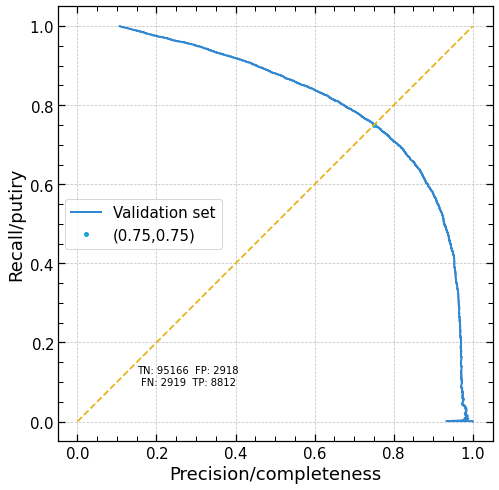

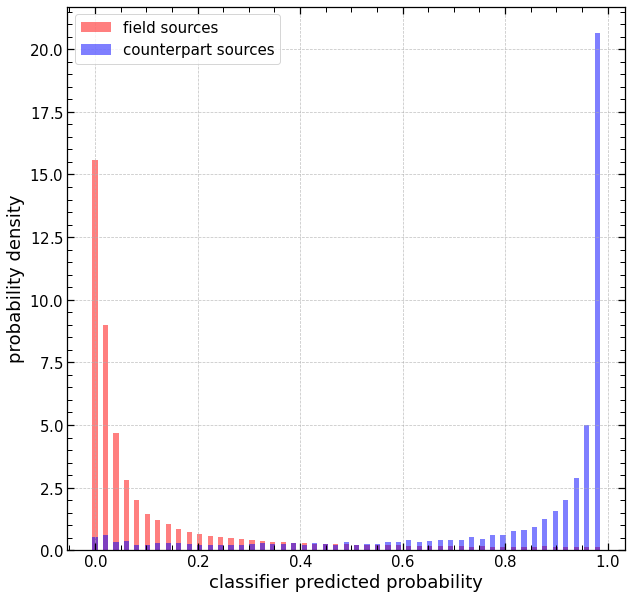

In [62]:
assess_classifier(model, X_val, y_val);

Optimal threshold: 0.99
Optimal precision: 0.00


<Figure size 360x360 with 0 Axes>

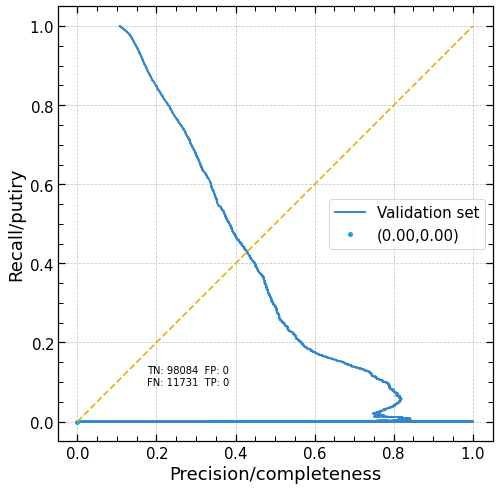

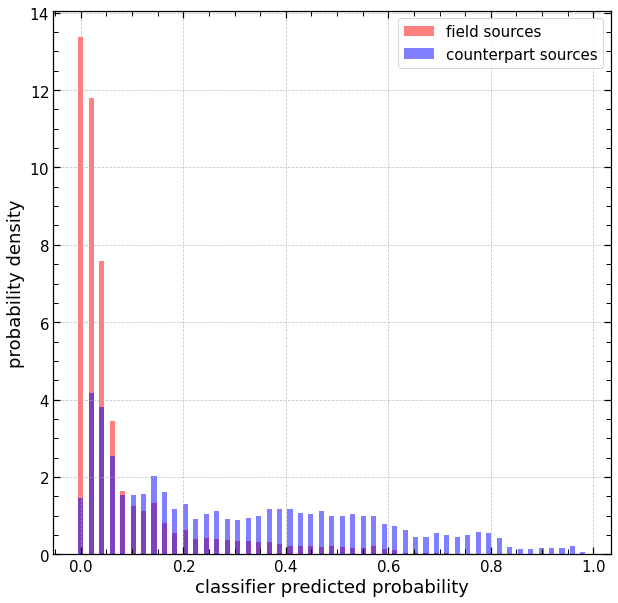

In [69]:
X_val_grz = X_val.copy()
X_val_grz[:, [3,4,5,6, 10,11,12,13,14,15]] = np.nan

assess_classifier(model, X_val_grz, y_val);

## GRZ data - pessimistic model

In [38]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grz')

total x-ray sources:  38161
total non-x-ray sources:  309342
total sources:  347503
number of x-ray sources per flux bin:
x_ray_flux_bin
0    38161
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    309342
dtype: int64
x-ray flux bins:
[3.00076359e-15 9.70410542e-12]
********************
flux bin:  3.0007635913564e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'col_gr', 'col_rz', 'col_gz']
train size examples - filed:  173232
train size examples - x-ray: 21370
test size examples - filed:  43308
test size examples - x-ray 5343
validation size examples - filed:  92802
validation size examples - x-ray: 11448
downsampled field sources:  False
data is scaled


In [39]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])




In [40]:
y_train_weight = class_weight_train[0]*(1-y_train)+class_weight_train[1]*y_train
model = XGBClassifier(n_estimators = 500, max_depth = 6, verbosity = 0, n_jobs = -1, eval_metric = 'loss',
    use_label_encoder=False)
y_train_transform = np.array([1 if y == 1 else 0 for y in y_train])
y_test_transform = np.array([1 if y == 1 else 0 for y in y_test])
model.fit(X_train, y_train_transform, eval_set=[(X_test, y_test_transform)], sample_weight = y_train_weight, eval_metric='logloss', early_stopping_rounds=10, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='loss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

Optimal threshold: 0.70
Optimal precision: 0.56


<Figure size 360x360 with 0 Axes>

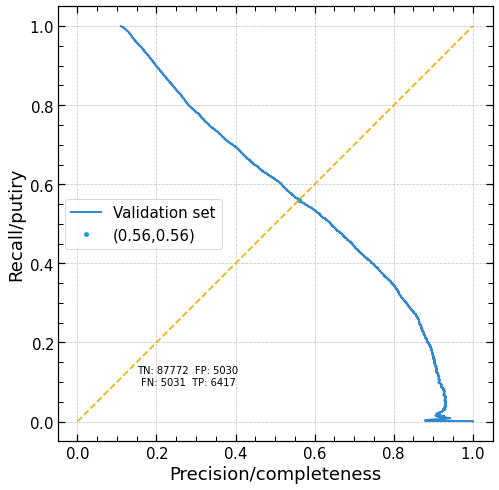

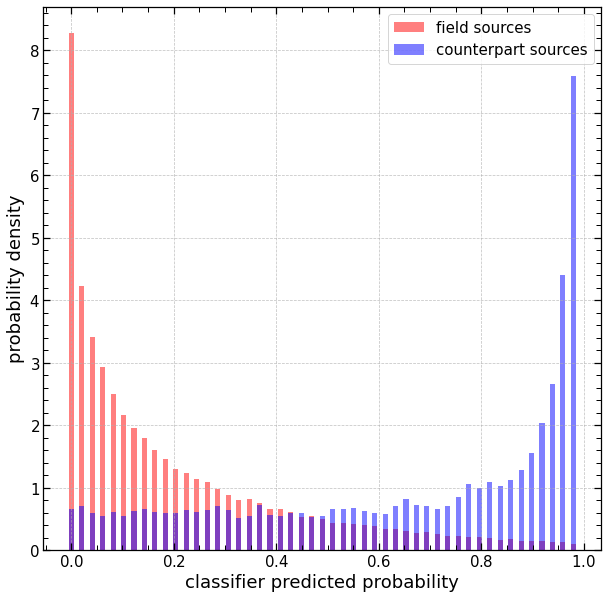

In [41]:
assess_classifier(model, X_val, y_val);

## GRZW1W2W3W4 data - best possible model

In [56]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2w3w4')

/Users/sdbykov/work/lockman_hole/1_csc-desi-photo-prior/../scripts/cross_match_scripts.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


total x-ray sources:  19769
total non-x-ray sources:  46342
total sources:  66111
number of x-ray sources per flux bin:
x_ray_flux_bin
0    19769
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    46342
dtype: int64
x-ray flux bins:
[3.00100307e-15 9.70410542e-12]
********************
flux bin:  3.0010030697394e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'mag_w3', 'mag_w4', 'col_gr', 'col_rz', 'col_gz', 'col_zw1', 'col_rw2', 'col_w1w2', 'col_zw3', 'col_rw4', 'col_w3w4']
train size examples - filed:  25952
train size examples - x-ray: 11070
test size examples - filed:  6488
test size examples - x-ray 2768
validation size examples - filed:  13902
validation size examples - x-ray: 5931
downsampled field sources:  False
data is scaled


In [57]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 8)                 136       
                                                                 
 dense_77 (Dense)            (None, 8)                 72        
                                                                 
 dropout_42 (Dropout)        (None, 8)                 0         
                                                                 
 dense_78 (Dense)            (None, 8)                 72        
                                                                 
 dropout_43 (Dropout)        (None, 8)                 0         
                                                                 
 dense_79 (Dense)            (None, 8)                 72        
                                                                 
 dropout_44 (Dropout)        (None, 8)               